In [2]:
import torch
import pydiffvg
import matplotlib.pyplot as plt

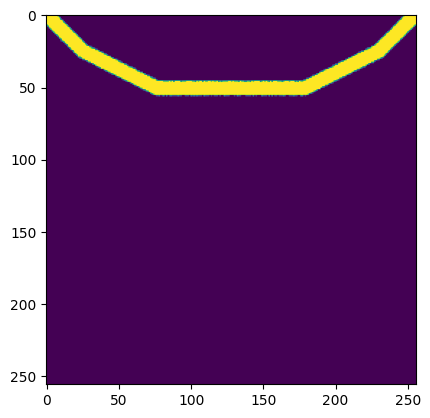

In [10]:
render = pydiffvg.RenderFunction.apply

width = 256
traj = torch.tensor([[0.0, 0.0], [0.1, 0.1], [0.3, 0.2], [0.7, 0.2], [0.9, 0.1], [1.0, 0.0]], requires_grad=True) * width
# radius = torch.tensor([5.0], requires_grad=True)

poly = pydiffvg.Polygon(
    points=traj,
    is_closed=False,
    stroke_width=torch.tensor([5.0])
)
# poly = pydiffvg.Path(
#     num_control_points = torch.tensor([0]),
#     points=torch.stack([traj[i][0], traj[i][-1]], dim=0),
#     is_closed=False
# )
shape_group = pydiffvg.ShapeGroup(
    shape_ids=torch.tensor([0]),
    fill_color=torch.tensor([0.0, 0.0, 0.0, 0.0]),
    stroke_color=torch.tensor([0.0, 0.0, 0.0, 1.0])
)

scene_args = pydiffvg.RenderFunction.serialize_scene(width, width, [poly], [shape_group])

img = render(
    width, # width
    width, # height
    2, # num_samples_x
    2, # num_samples_y
    0, # seed
    None, # background_image
    *scene_args
)
img = img[:, :, 3]

loss = torch.sum(img)
loss.backward()

plt.imshow(img.detach().cpu().numpy())